In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("insurance.csv")


### EDA

In [4]:
df.shape

(1338, 7)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
numeric_columns = ['age','bmi','children','charges']
numeric_columns

['age', 'bmi', 'children', 'charges']

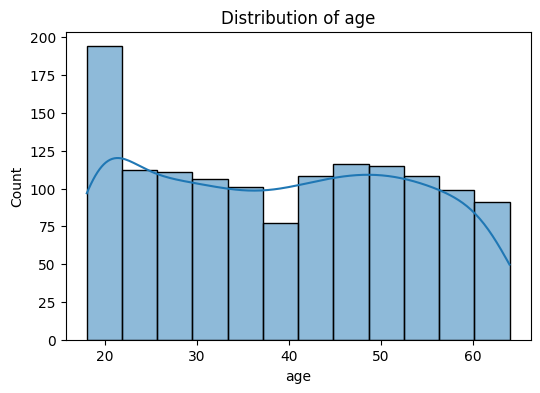

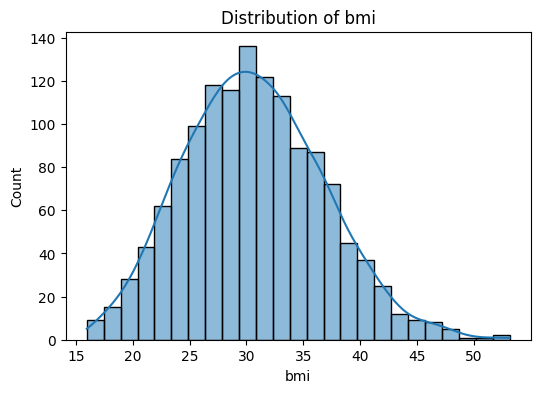

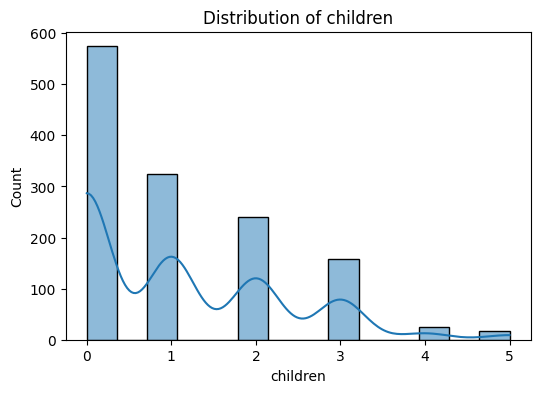

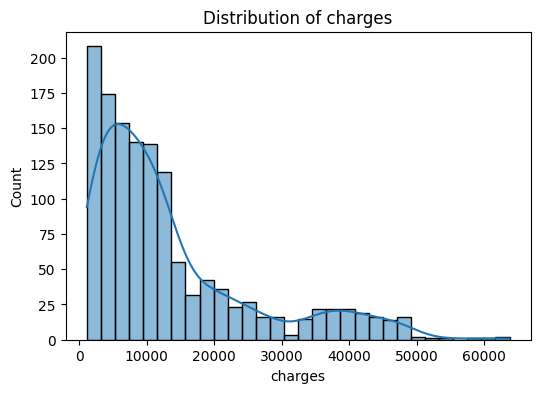

In [11]:
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [12]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

<Axes: xlabel='children', ylabel='count'>

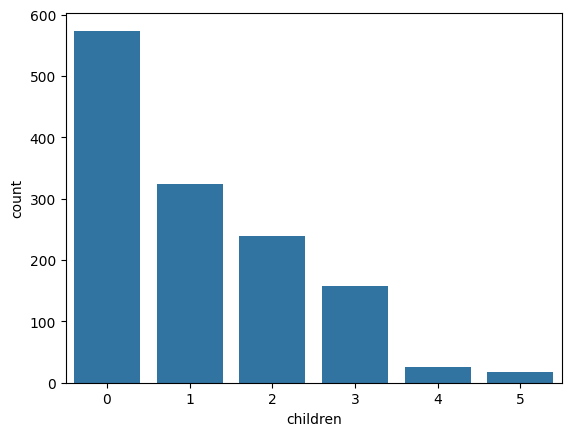

In [13]:
sns.countplot(x= df['children'])

<Axes: xlabel='region', ylabel='count'>

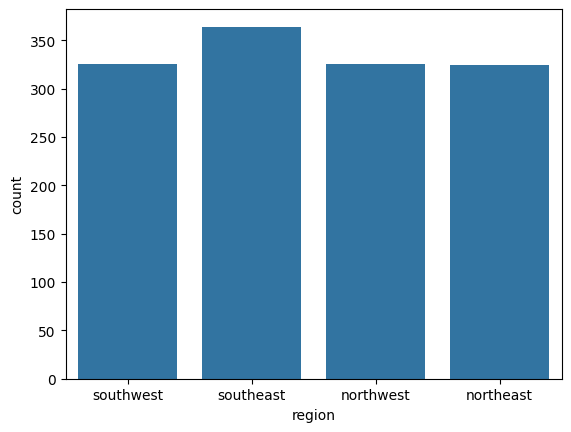

In [14]:
sns.countplot(x= df['region'])

<Axes: xlabel='sex', ylabel='count'>

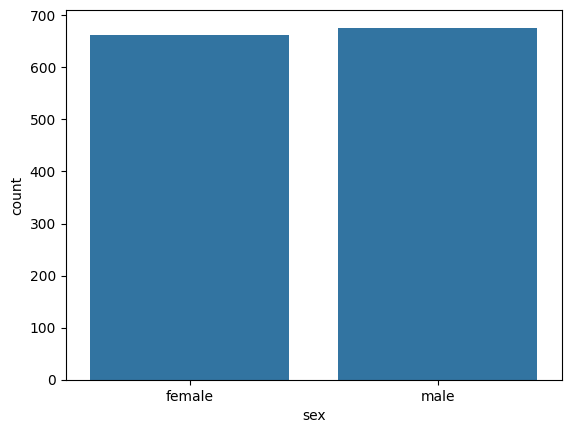

In [15]:
sns.countplot(x= df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

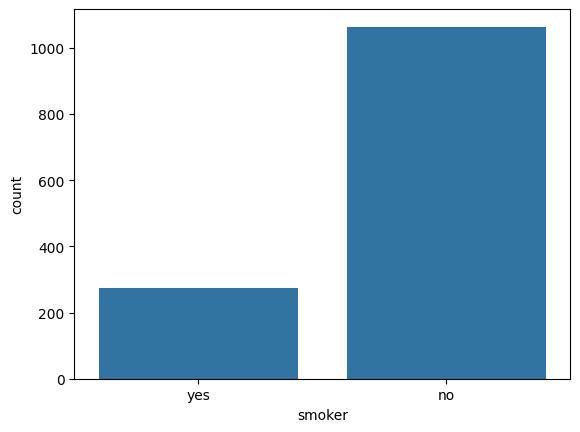

In [16]:
sns.countplot(x = df['smoker'])

<Axes: xlabel='sex', ylabel='count'>

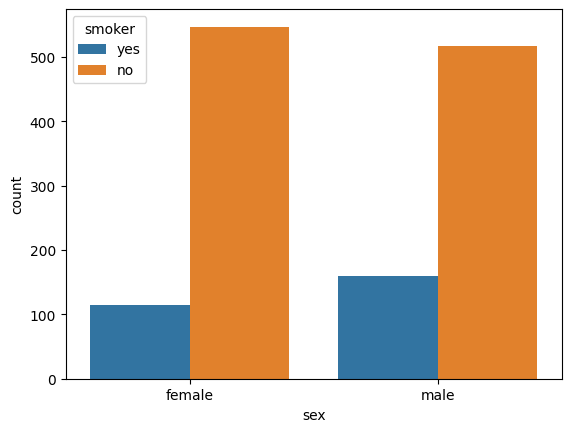

In [17]:
sns.countplot(x= df['sex'], hue= df['smoker'])

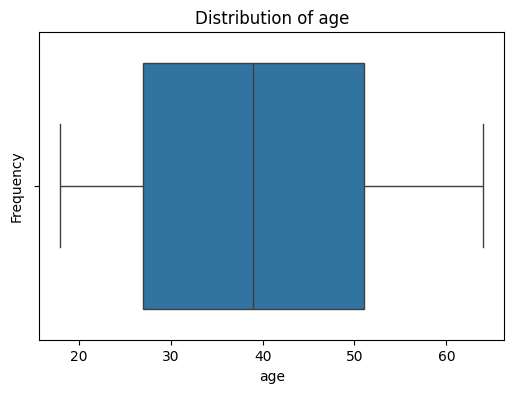

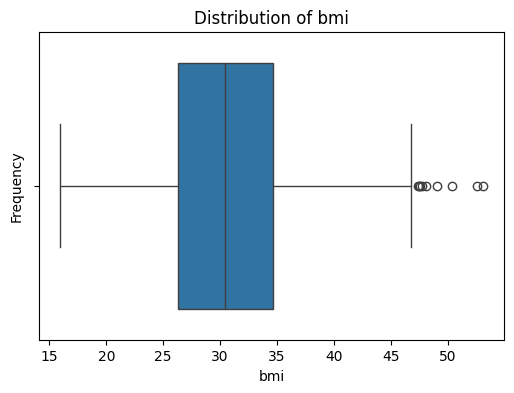

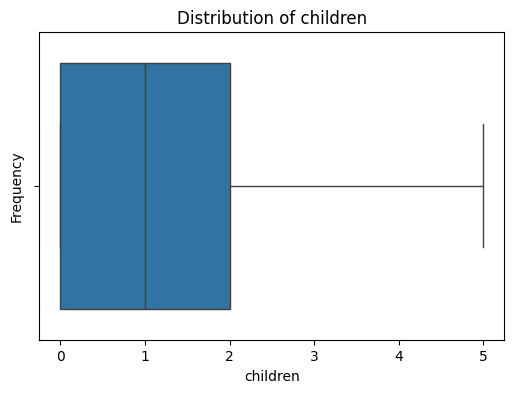

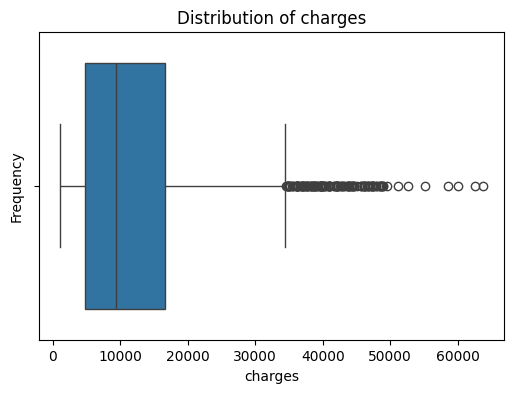

In [18]:
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<Axes: >

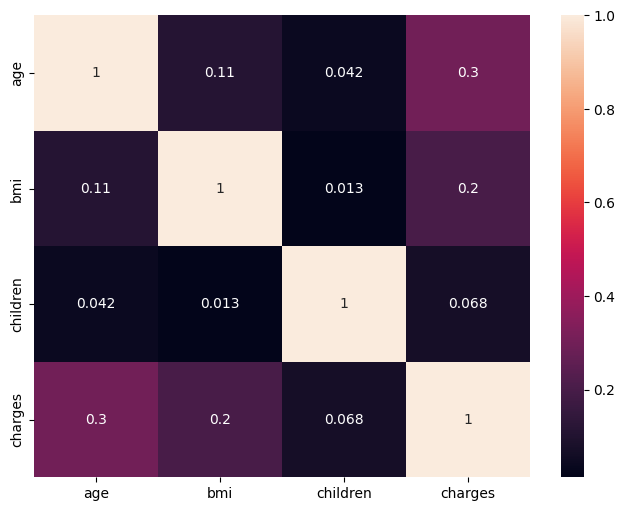

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

# Data Cleaning and Preprocessing

In [20]:
df_cleaned = df.copy()

In [21]:
df_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [22]:
df_cleaned.shape

(1338, 7)

In [23]:
df_cleaned.drop_duplicates(inplace= True)

In [24]:
df_cleaned.shape

(1337, 7)

In [25]:
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [26]:
df_cleaned['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [27]:
df_cleaned['sex'] = df_cleaned['sex'].map({'male': 0, 'female': 1})

In [28]:
df_cleaned['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [29]:
df_cleaned['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

In [30]:
df_cleaned['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [31]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [32]:
df_cleaned.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region       object
charges     float64
dtype: object

In [33]:
df_cleaned.rename(columns={'sex': 'is_female', 'smoker': 'is_smoker'}, inplace=True)

In [34]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [35]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['region'],)

In [36]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,False,True
1,18,0,33.770,1,0,1725.55230,False,False,True,False
2,28,0,33.000,3,0,4449.46200,False,False,True,False
3,33,0,22.705,0,0,21984.47061,False,True,False,False
4,32,0,28.880,0,0,3866.85520,False,True,False,False


In [37]:
df_cleaned[['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']] = df_cleaned[['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']].astype(int)

In [38]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


# Feature Engineering and Extraction

In [39]:
df_cleaned['bmi_category'] = pd.cut(df_cleaned['bmi'],
    bins = [0,18.5,24.9,29.9,float('inf')],
    labels=['underweight', 'normal weight', 'overweight', 'obesity']
)

In [40]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27.900,0,1,16884.92400,0,0,0,1,overweight
1,18,0,33.770,1,0,1725.55230,0,0,1,0,obesity
2,28,0,33.000,3,0,4449.46200,0,0,1,0,obesity
3,33,0,22.705,0,0,21984.47061,0,1,0,0,normal weight
4,32,0,28.880,0,0,3866.85520,0,1,0,0,overweight


In [41]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['bmi_category'],)

In [42]:
df_cleaned = df_cleaned.astype(int)

# Feature Scaling

In [44]:
from sklearn.preprocessing import StandardScaler
cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])

In [45]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_underweight,bmi_category_normal weight,bmi_category_overweight,bmi_category_obesity
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,0,1,0,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,0,1,0,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,0,1,0,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,1,0,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,1,0,0,0,0,1,0


In [46]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'bmi_category_underweight',
       'bmi_category_normal weight', 'bmi_category_overweight',
       'bmi_category_obesity'],
      dtype='object')

In [47]:
from scipy.stats import pearsonr

Selected_features = ['age', 'is_female', 'bmi', 'children', 'is_smoker',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'bmi_category_underweight',
       'bmi_category_normal weight', 'bmi_category_overweight',
       'bmi_category_obesity']

Coorealation = {
    feature : pearsonr(df_cleaned['charges'], df_cleaned[feature])[0]
    for feature in Selected_features
}

Coorealation_df = pd.DataFrame(list(Coorealation.items()), columns=['Feature', 'Person Correlation'])
Coorealation_df.sort_values(by = 'Person Correlation', ascending=False)

,Feature,Person Correlation
4,is_smoker,0.787234
0,age,0.298309
12,bmi_category_obesity,0.197660
2,bmi,0.196236
7,region_southeast,0.073577
3,children,0.067390
5,region_northeast,0.005946
6,region_northwest,-0.038695
8,region_southwest,-0.043637
9,bmi_category_underweight,-0.048225


In [50]:
cat_features = [
    'is_female', 'is_smoker',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'bmi_category_normal weight', 'bmi_category_overweight',
       'bmi_category_obesity']

In [51]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05

df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'], q=4, labels=False)
chi2_results = {}

for col in cat_features:
    contingency = pd.crosstab(df_cleaned[col], df_cleaned['charges_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df

,chi2_statistic,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
is_female,10.258784,0.01649,Reject Null (Keep Feature)
bmi_category_obesity,7.654464,0.05372,Accept Null (Drop Feature)
region_northeast,6.438442,0.092122,Accept Null (Drop Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
bmi_category_normal weight,4.263673,0.234364,Accept Null (Drop Feature)
bmi_category_overweight,4.201575,0.240504,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


In [52]:
final_df = df_cleaned[['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges','region_southeast','bmi_category_obesity']]

In [54]:
final_df.head()

,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi_category_obesity
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0
1,-1.511647,0,0.462463,-0.079442,0,1725,1,1
2,-0.799350,0,0.462463,1.580143,0,4449,1,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,0


In [55]:
final_df = final_df.to_csv('Clean_Insurance.csv')